In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/Training_set.csv
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_747.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_561.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_345.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_844.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_270.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_526.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_968.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_322.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_860.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test/Image_1103.jpg
/kaggle/input/ai-1810-dpl-302-m-butterfly-image-c

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")

In [3]:
df = pd.read_csv("/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/Training_set.csv")
df.head(5)

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5000 non-null   object
 1   label     5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [5]:
df.describe

<bound method NDFrame.describe of             filename                     label
0        Image_1.jpg          SOUTHERN DOGFACE
1        Image_2.jpg                    ADONIS
2        Image_3.jpg            BROWN SIPROETA
3        Image_4.jpg                   MONARCH
4        Image_5.jpg  GREEN CELLED CATTLEHEART
...              ...                       ...
4995  Image_4996.jpg                ORANGE TIP
4996  Image_4997.jpg                   MONARCH
4997  Image_4998.jpg           GREY HAIRSTREAK
4998  Image_4999.jpg                   MONARCH
4999  Image_5000.jpg         COMMON BANDED AWL

[5000 rows x 2 columns]>

In [6]:
len(df)

5000

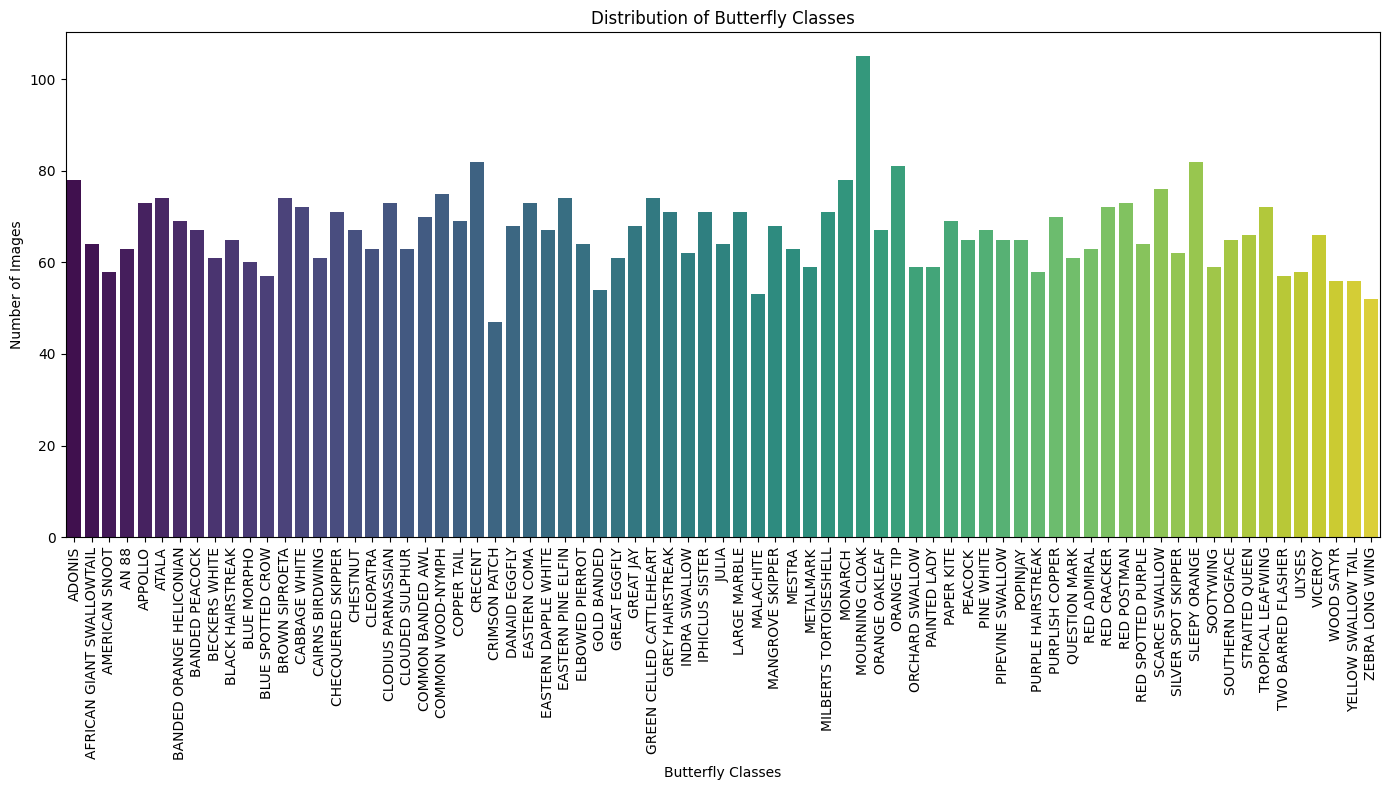

In [7]:
class_counts = df['label'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

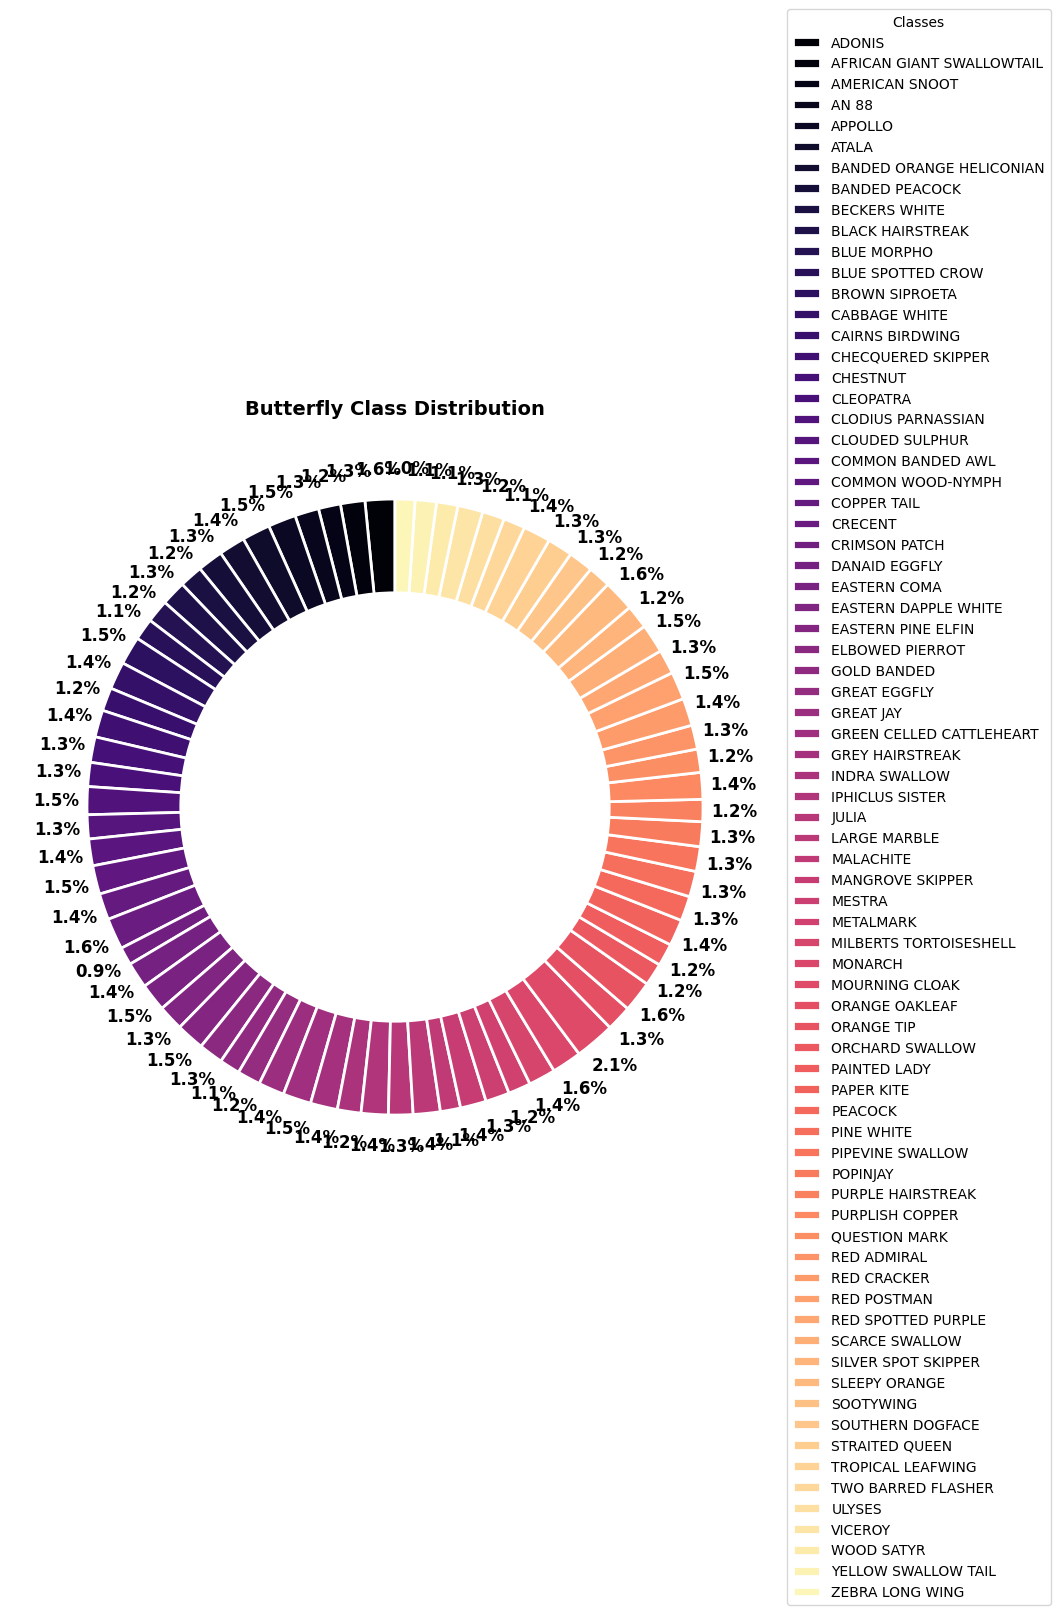

In [8]:
class_counts = df['label'].value_counts().sort_index()
colors = sns.color_palette("magma", len(class_counts))
plt.figure(figsize=(10, 10))
wedges, texts, autotexts = plt.pie(
    class_counts.values, 
    labels=None, 
    autopct='',  # Hide default percentages
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
for i, (p, label) in enumerate(zip(wedges, class_counts.index)):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1  # Angle for text placement
    x = 1.1 * p.r * np.cos(np.radians(ang))
    y = 1.1 * p.r * np.sin(np.radians(ang))
    plt.text(x, y, f"{class_counts.values[i] / class_counts.sum() * 100:.1f}%", 
             ha="center", va="center", fontsize=12, fontweight="bold", color="black")
plt.title('Butterfly Class Distribution', fontsize=14, fontweight="bold")
plt.legend(class_counts.index, title="Classes", loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

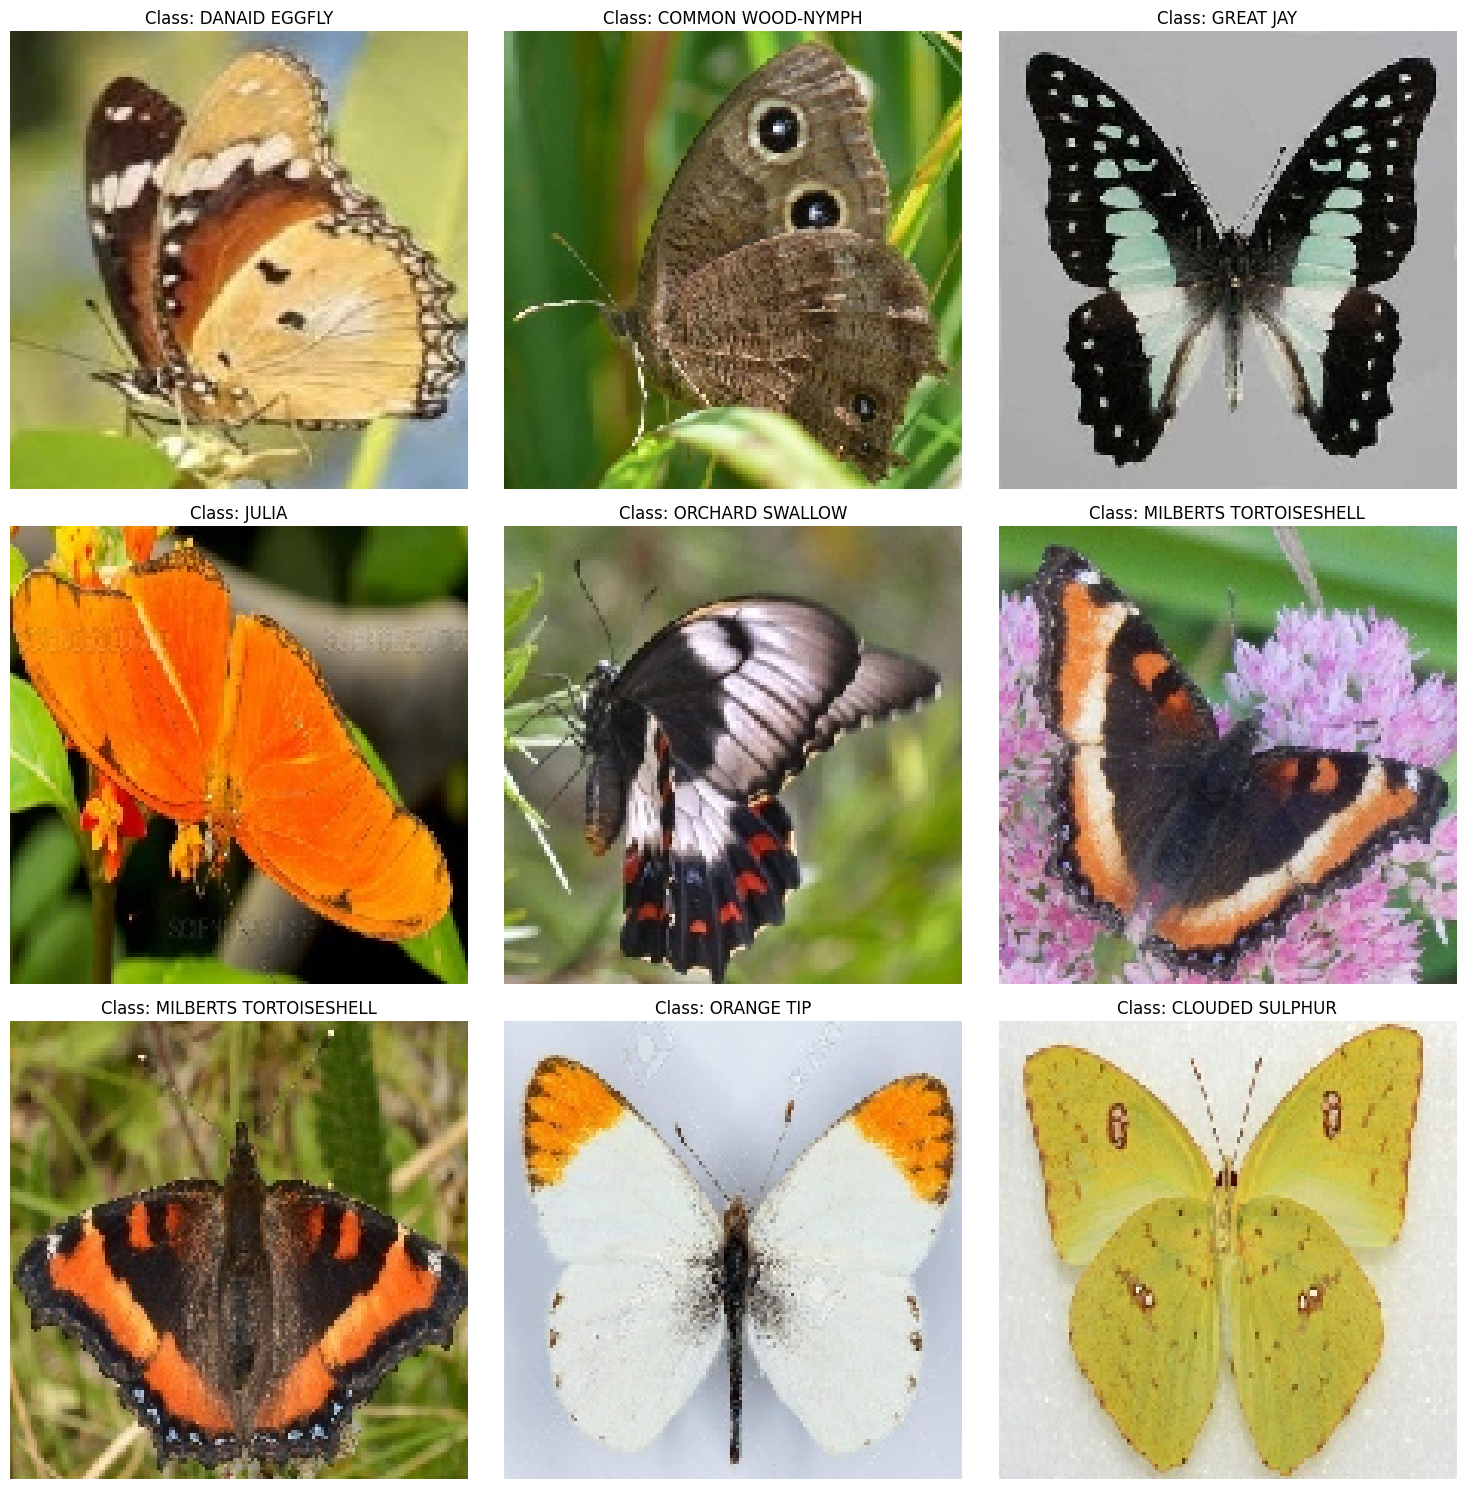

In [9]:
image_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/train/train"

sample_images = df.sample(9, random_state=42)


fig, axes = plt.subplots(3, 3, figsize=(15, 15))


for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [62]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Định nghĩa thư mục chứa ảnh
image_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/train/train"

# Đọc file CSV chứa nhãn chính xác
df = pd.read_csv("/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/Training_set.csv")

# Lọc ra các ảnh thực sự tồn tại trong thư mục
df = df[df['filename'].isin(os.listdir(image_dir))]

# Kiểm tra tổng số ảnh
total_images = len(df)
print(f"Tổng số ảnh: {total_images}")

# Kiểm tra nếu tổng số ảnh nhỏ hơn 5000
if total_images < 5000:
    print("⚠️ Cảnh báo: Tổng số ảnh nhỏ hơn 5000, có thể không đủ để chia train/dev theo yêu cầu!")

# Chia dữ liệu thành tập train (4000 ảnh) và validation (1000 ảnh)
train_df, val_df = train_test_split(df, train_size=4000, random_state=42, stratify=df['label'])

# Kiểm tra số lượng mẫu trong từng tập
print(f"Train set: {len(train_df)}, Validation set: {len(val_df)}")

# Tạo ImageDataGenerator cho tập train với các biến đổi dữ liệu (Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Tạo ImageDataGenerator cho tập validation (chỉ rescale)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Tạo generator cho tập train
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=image_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Tạo generator cho tập validation
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=image_dir,
    x_col="filename",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Tổng số ảnh: 5000
Train set: 4000, Validation set: 1000
Found 4000 validated image filenames belonging to 75 classes.
Found 1000 validated image filenames belonging to 75 classes.


In [64]:
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(75, activation='softmax')
])

model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_CNN.summary()








Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 72, 72, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 34, 34, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 256)                 │       9,470,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 75)                  │          19,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,536,619 (36.38 MB)

 Trainable params: 9,536,619 (36.38 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 🛠 Thêm EarlyStopping để tránh overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# 🏗 Tính toán steps_per_epoch và validation_steps hợp lý
steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
validation_steps = max(1, val_generator.samples // val_generator.batch_size)  # Sửa lỗi tuple

# 🔍 Kiểm tra số batch hợp lệ trước khi train
print("Tổng số ảnh train:", train_generator.samples)
print("Batch size train:", train_generator.batch_size)
print("Số bước train:", steps_per_epoch)

print("Tổng số ảnh validation:", val_generator.samples)
print("Batch size validation:", val_generator.batch_size)
print("Số bước validation:", validation_steps)




Tổng số ảnh train: 4000
Batch size train: 32
Số bước train: 125
Tổng số ảnh validation: 1000
Batch size validation: 32
Số bước validation: 31


In [67]:
# 🛠 Thêm EarlyStopping để tránh overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

# 🏗 Tính toán steps_per_epoch và validation_steps hợp lý
steps_per_epoch = max(1, (train_generator.samples // train_generator.batch_size) - 1)
validation_steps = max(1, (val_generator.samples // val_generator.batch_size) - 1)

# 🚀 Huấn luyện model
history = model_CNN.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,  # Giới hạn để không lỗi thiếu dữ liệu
    epochs=40,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping],
    verbose=1  # In log quá trình train
)


Epoch 1/40
 13/124 ━━━━━━━━━━━━━━━━━━━━ 1:12 651ms/step - accuracy: 0.0096 - loss: 4.4157

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
val_images, val_labels = next(val_generator)

pred_labels = model_CNN.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import pandas as pd

# Thư mục chứa ảnh test
test_dir = "/kaggle/input/ai-1810-dpl-302-m-butterfly-image-classification/test/test"

# Lấy danh sách ảnh test
import os
test_images = sorted(os.listdir(test_dir))  # Đảm bảo sắp xếp theo đúng thứ tự
test_df = pd.DataFrame({"ID": test_images})

# Tạo generator cho tập test
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col="ID",
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# Dự đoán
predictions = model_CNN.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Mapping nhãn từ số sang tên loài bướm
class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_labels = [class_names[label] for label in predicted_classes]


In [ ]:
submission_df = pd.DataFrame({
    "ID": test_df["ID"],  # Cột ID trùng với tên file ảnh trong tập test
    "label": predicted_labels  # Cột label chứa tên loài bướm
})

# Lưu file CSV để nộp bài
submission_df.to_csv("submission.csv", index=False)
print("✅ File submission.csv đã được tạo thành công!")


In [ ]:
print(submission_df.head())
print(len(submission_df))  # Kiểm tra số lượng dòng có khớp với số ảnh test không


In [ ]:
from IPython.display import FileLink
FileLink(r"submission.csv")